In [12]:
import sys
import numpy as np
import pandas as pd
from scipy.stats import pearsonr as pr
from matplotlib import pyplot as plt
import matplotlib as mpl
import string

In [11]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Times New Roman'

#### 1. feature correlation

In [2]:
infile = '../Results/TS_Data_top10_three_labels.csv'
outname = '../Results/featurecorrelationmap_top10_three_labels.pdf'

In [5]:
df = pd.read_csv(infile, index_col=0)
data = df.values
print(data.shape)

(117, 10)


In [6]:
pr_matrix =np.zeros([data.shape[1], data.shape[1]])
print(pr_matrix.shape)
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        pr_matrix[i,j] = pr(data[:,i], data[:,j])[0]**2

(10, 10)


In [9]:
def plot_heatmap(data, cmp, xlabel, ylabel):
    x = range(data.shape[1]+1)
    y = list(range(data.shape[0]+1))
    y.sort(reverse=True)
    plt.pcolormesh(x, y, data, cmap = cmp ) #Paired 'GnBu'
    zbar = plt.colorbar(orientation="horizontal", pad=0.02)
    zbar.set_label('Squared Pearson Coefficient')
    #zbar.set_ticks([np.min(data),np.max(data)])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([])
    plt.yticks([])
    #zbar.set_ticks([])

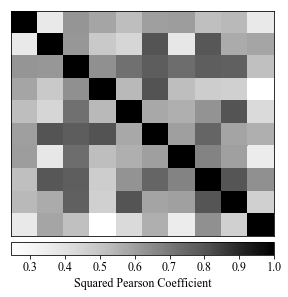

In [10]:
fig, ax = plt.subplots(figsize=(4.724,5))
plot_heatmap(pr_matrix, 'Greys', '', '')
fig.savefig(outname)
plt.show()

#### 2. feature bar

In [19]:
plt.close()
mpl.rcParams['font.size'] = 9

infile = '../Results/TS_Data_top10_three_labels.csv'
df = pd.read_csv(infile,index_col=0)

In [22]:
plt.figure(figsize=(4.72441,15))
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

<Figure size 340.158x1080 with 0 Axes>

A MF_armax_3_1_05_1_minfpe
B MF_armax_2_2_05_1_p4_5
C MF_AR_arcov_5_a5
D MF_StateSpace_n4sid_3_05_1_p3_5
E MF_GARCHfit_ar_P1_Q2_stde_acmnd0
F MF_armax_3_1_05_1_p3_5
G MF_armax_3_1_05_1_p5_5
H MF_armax_2_2_05_1_p1_5
I MF_GARCHfit_ar_P1_Q2_stde_p4_5
J MF_FitSubsegments_arma_2_2_uniform_25_01_q_2_max


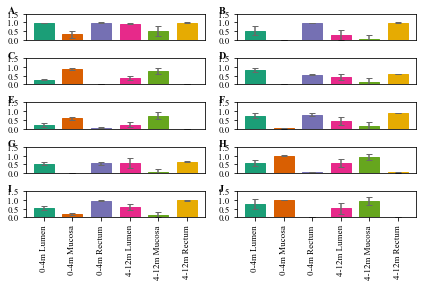

In [23]:
for i in range(len(df.columns)):
    plt.subplot(5,2,i+1)
    data = dict()
    for j in range(len(df.index)):
        cont =  df.index[j].split('_')
        if cont[-2] == '4m': key = '0-4m '+cont[0]
        if cont[-2] == '12m': key = '4-12m '+cont[0]
        data[key] = data.get(key,[]) + [df.values[j,i]]
    keys = list(data.keys())
    keys.sort()

    means, stds = list(),list()
    for key in keys:
        means.append(np.mean(data[key]))
        stds.append(np.std(data[key]))

    ind = np.arange(len(means))
    plt.bar(ind,means,yerr=stds,align='center',color=colors,
                                ecolor='#696969',edgecolor=colors,
                                width=0.7, capsize=3)
    ticks = list()
    for item in keys: ticks.append(item.replace('_','m '))
    if i+1>8:
        plt.xticks(ind,ticks,rotation='vertical')
    else:plt.xticks([])
    #plt.title(df.columns[i])
    plt.ylim([0,1.5])
    plt.yticks([0,0.5,1.0,1.5])
    plt.text(-1.25, 1.53, string.ascii_uppercase[i],
            size=10, weight='bold')
    print(string.ascii_uppercase[i],df.columns[i])

# legend
#plt.subplot(5,2,11)
#plt.text(1,1,keys[0].replace('_',' '),bbox={'facecolor':colors[0], 'alpha':0.5, 'pad':2, 'edgecolor':'k'},fontsize=12)
plt.tight_layout()
plt.savefig('../Results/bar_chart_top10.pdf')
plt.show()